## **Time Series Decomposition**

### **Comparing NVIDIA and Walmart Stock Prices**

In [2]:
# Time Series Decomposition: Trend, Seasonality, and Residuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

c:\Users\james\anaconda3\envs\python3113\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [11]:
# Get NVIDIA stock data 

nvda = yf.Ticker("NVDA")
nvda = nvda.history(period="5y")
nvda = nvda['Close']
print(nvda.head())

# Get Walmart stock data 
walmart = yf.Ticker("WMT")
walmart = walmart.history(period="5y")
walmart = walmart['Close']
print(walmart.head())

Date
2019-08-01 00:00:00-04:00    4.099334
2019-08-02 00:00:00-04:00    4.006621
2019-08-05 00:00:00-04:00    3.748114
2019-08-06 00:00:00-04:00    3.786890
2019-08-07 00:00:00-04:00    3.825169
Name: Close, dtype: float64
Date
2019-08-01 00:00:00-04:00    33.680088
2019-08-02 00:00:00-04:00    33.686249
2019-08-05 00:00:00-04:00    32.583908
2019-08-06 00:00:00-04:00    33.030392
2019-08-07 00:00:00-04:00    33.316738
Name: Close, dtype: float64


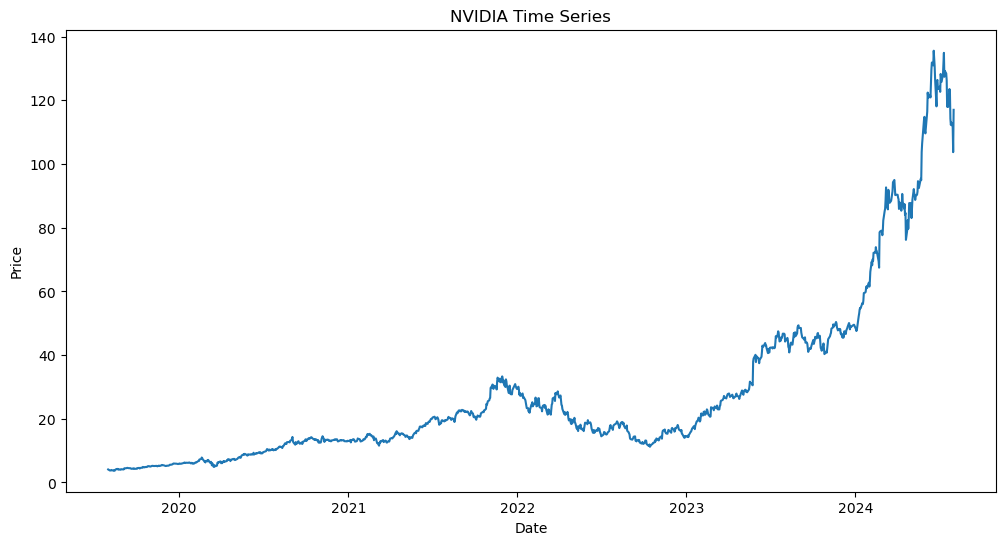

In [5]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(nvda)
plt.title('NVIDIA Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

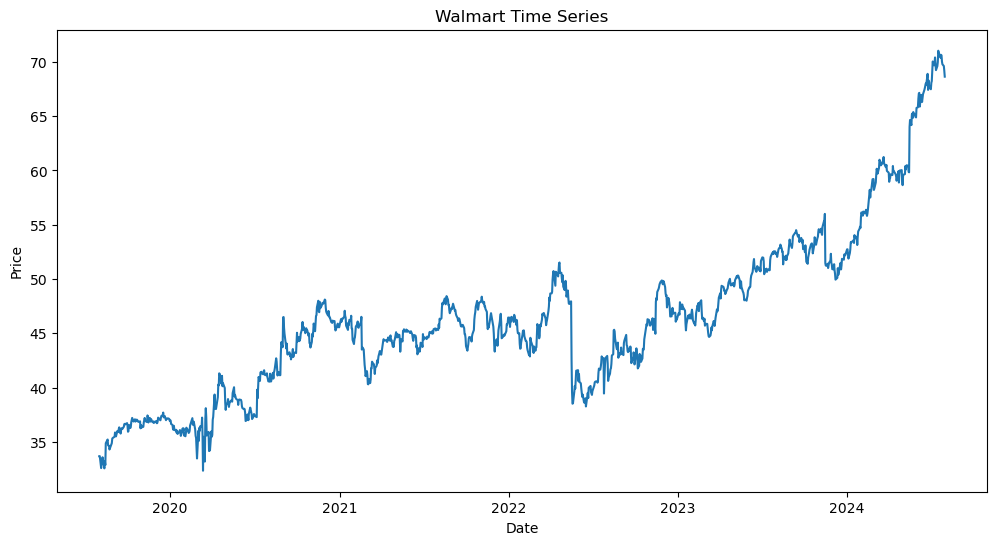

In [14]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(walmart)
plt.title('Walmart Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Additive Decomposition:**

**Business Sense:**

**Concept:** This method assumes that the components of a time series (trend, seasonality, and residuals) are added together to create the observed data.  
**Application:** It's best for businesses where seasonal effects are consistent regardless of the overall trend.

**Examples:**

**Retail:** A store that consistently sells 1000 more units during holiday seasons, regardless of its overall sales level.
**Service Industry:** A car wash that gets 100 more customers on sunny days, irrespective of the general business trend.

**Product Sense:**

**Usage:** Ideal for products where feature usage or engagement increases by a fixed amount during certain periods.
**Example:** A productivity app that sees a consistent increase of 10,000 daily active users during the work week, regardless of its overall user base size.

**Key Insight:** Additive decomposition helps businesses identify consistent, predictable changes in their metrics, which can be crucial for resource planning and inventory management.

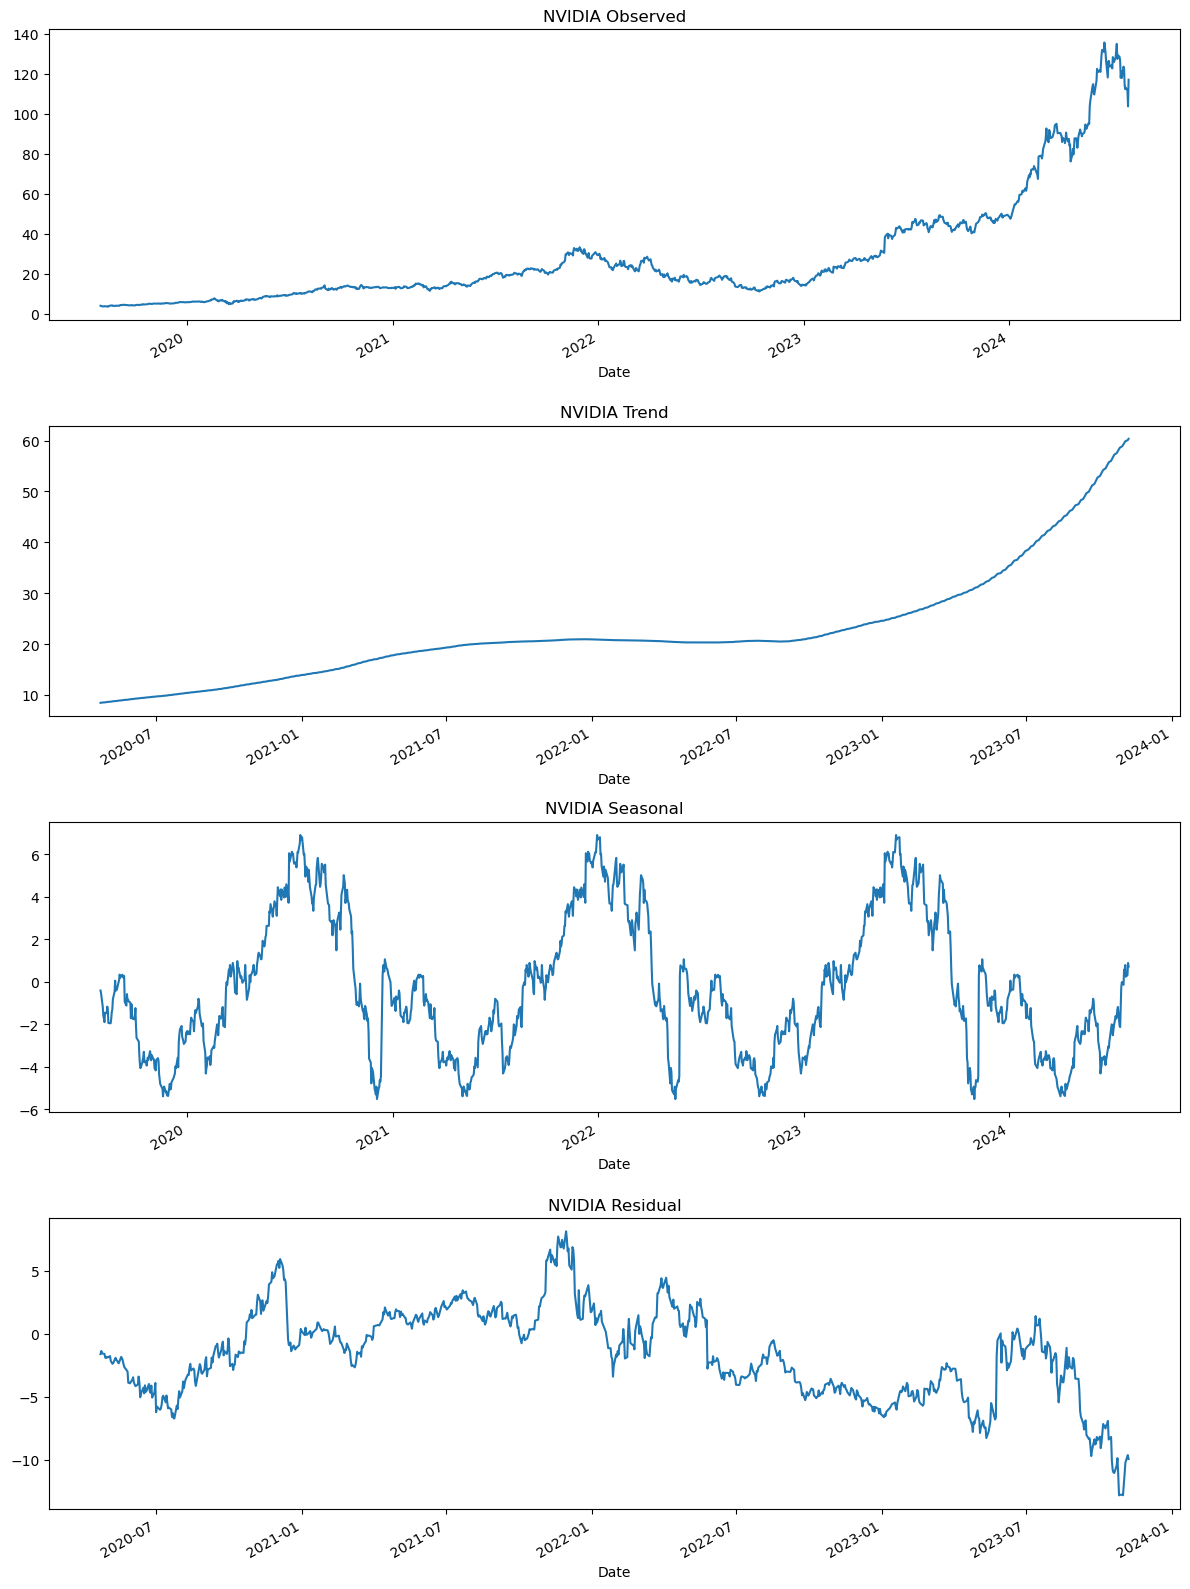

In [16]:
# 1. Additive Decomposition
additive_result = seasonal_decompose(nvda, model='additive', period=365)

# Plot additive decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
additive_result.observed.plot(ax=ax1)
ax1.set_title('NVIDIA Observed')
additive_result.trend.plot(ax=ax2)
ax2.set_title('NVIDIA Trend')
additive_result.seasonal.plot(ax=ax3)
ax3.set_title('NVIDIA Seasonal')
additive_result.resid.plot(ax=ax4)
ax4.set_title('NVIDIA Residual')
plt.tight_layout()
plt.show()

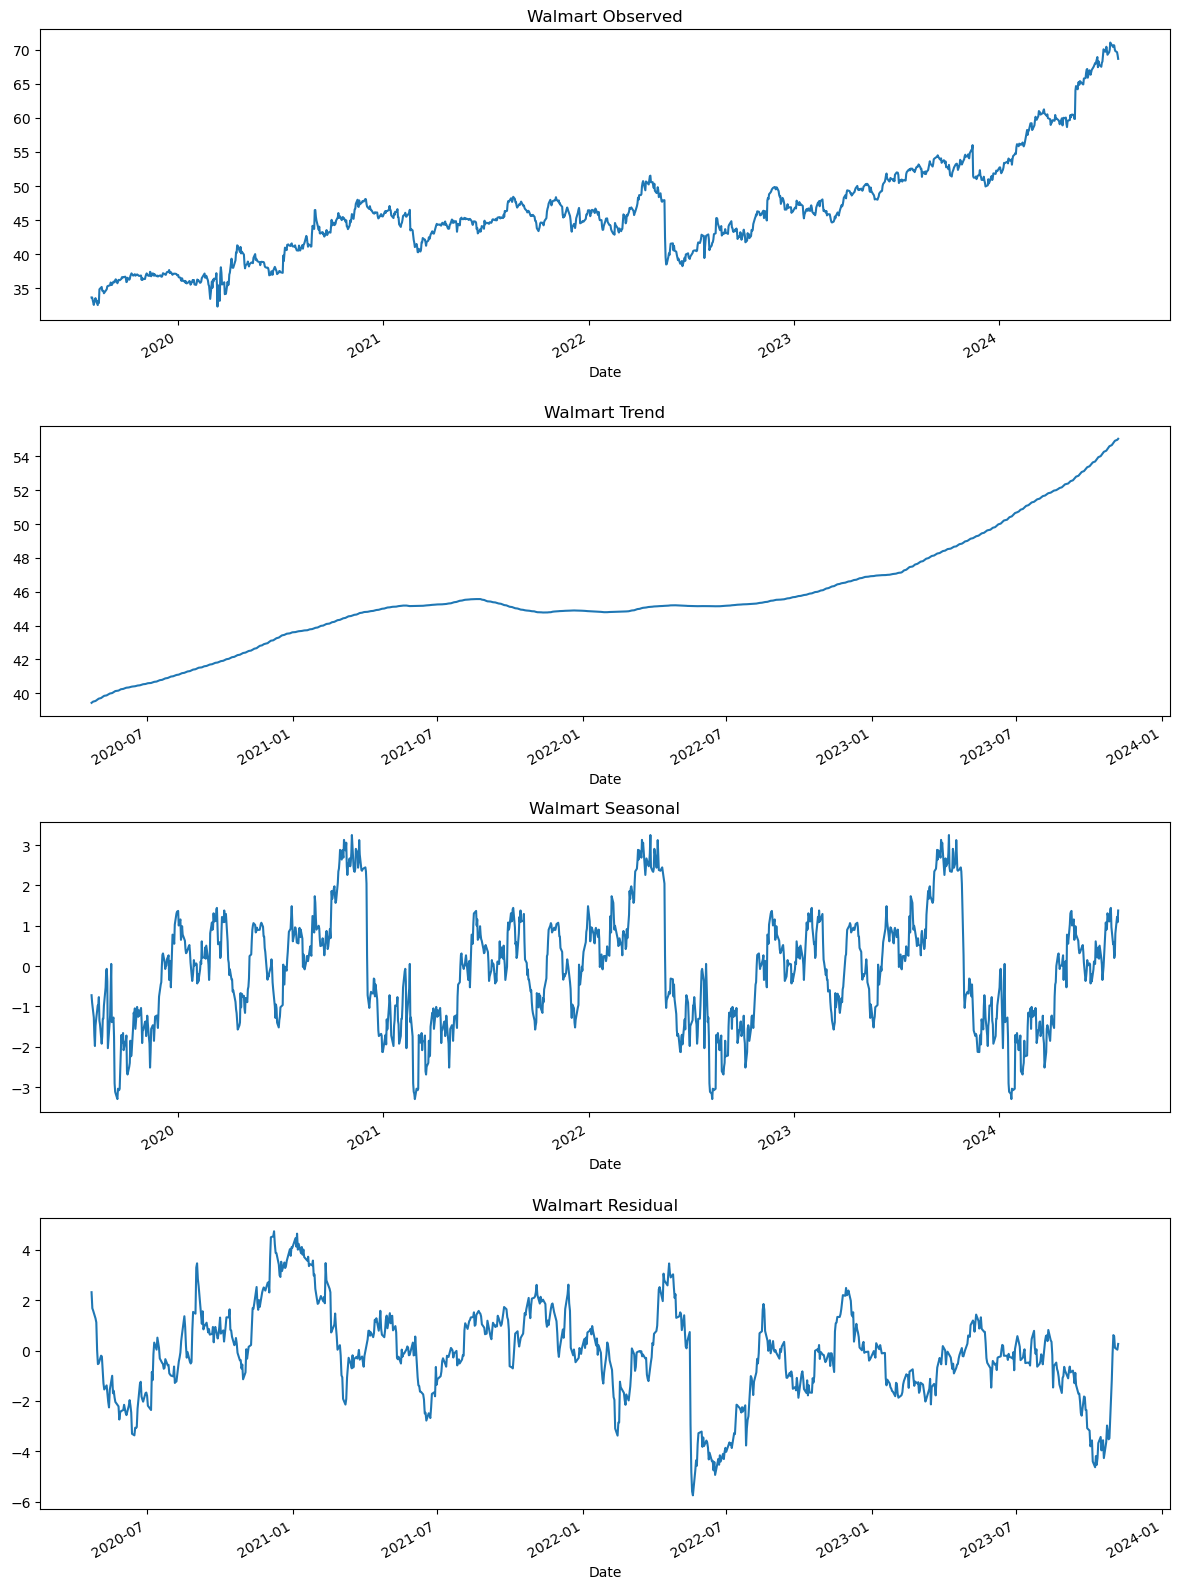

In [15]:
additive_result = seasonal_decompose(walmart, model='additive', period=365)

# Plot additive decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
additive_result.observed.plot(ax=ax1)
ax1.set_title('Walmart Observed')
additive_result.trend.plot(ax=ax2)
ax2.set_title('Walmart Trend')
additive_result.seasonal.plot(ax=ax3)
ax3.set_title('Walmart Seasonal')
additive_result.resid.plot(ax=ax4)
ax4.set_title('Walmart Residual')
plt.tight_layout()
plt.show()

### **Additive Decomposition Analysis of NVIDIA and Walmart Stock Prices**

The time series decomposition of NVIDIA and Walmart stock prices offers insightful details about their trends, seasonal patterns, and residuals. This type of decomposition is useful for understanding underlying patterns in time series data, which can be crucial for forecasting and strategic planning. Here's a detailed analysis based on the decomposition results for each company:

### NVIDIA Time Series Decomposition
1. **Observed Data**:
   - The observed time series shows significant growth over the period, especially a sharp increase starting around 2023.
   - This could be indicative of positive market reactions possibly due AI and data center growth, gaming trends, or other factors driving NVIDIA's stock price.

2. **Trend Component**:
   - The trend for NVIDIA exhibits a relatively stable increase initially, followed by a very steep rise in late 2023.
   - This suggests a strong underlying growth pattern, highlighting NVIDIA's expanding influence and possibly successful market strategies or technological advancements.

3. **Seasonal Component**:
   - NVIDIA shows clear periodic fluctuations that repeat annually, indicating seasonality in the stock price movements.
   - This could be related to cyclical industry events such as tech conferences, product releases, or fiscal reporting cycles.

4. **Residual Component**:
   - The residuals, which represent the irregular components of the series, show some volatility but do not exhibit any systematic pattern that persists.
   - These might reflect market reactions to unforeseen events or news that were not captured by the trend or seasonal components.

### Walmart Time Series Decomposition
1. **Observed Data**:
   - Walmart’s stock price shows a gradual increase with some fluctuations, but it exhibits a stable and steady rise especially from 2023 onwards.
   - This steady growth might be attributed to consistent business performance or strategic initiatives that resonated well with the market or it could be a slowing of inflation.

2. **Trend Component**:
   - The trend component for Walmart indicates a consistent upward trajectory, accelerating towards the latter part of the observed period.
   - This could reflect growing business efficiency, expansion strategies, or positive sectoral impacts.

3. **Seasonal Component**:
   - Walmart displays a significant seasonal pattern with consistent peaks and troughs, likely reflecting the effects of seasonal sales cycles, holiday periods, and promotional activities common in retail.
   - The amplitude of these seasonal fluctuations remains relatively stable, suggesting consistent consumer behavior patterns year-over-year.

4. **Residual Component**:
   - The residuals for Walmart also show some variability but without clear persistent patterns.
   - These might indicate responses to specific news items, market conditions, or other external factors not captured by the trend or seasonal data.

### Conclusions and Strategic Implications
- **NVIDIA** shows a more pronounced trend and higher growth potential, which might appeal to growth-oriented investors. However, the sharp rise in its stock price also suggests potential volatility that could increase investment risk.
- **Walmart** demonstrates more stability in its growth, with predictable seasonal patterns that could be leveraged for strategic planning and operational adjustments. Its stock may appeal to investors looking for stable returns and lower risk.

 

## **Multiplicative Decomposition:**

**Business Sense:**

**Concept:** This method assumes that the components are multiplied together to form the observed data.
**Application:** Suitable for businesses where seasonal effects grow proportionally with the trend.

**Examples:**

**E-commerce:** An online store where holiday sales boost is a percentage of the current sales level rather than a fixed amount.
**Investment:** A fund that sees percentage-based fluctuations in returns based on market seasons.

**Product Sense:**

**Usage:** Appropriate for products where seasonal usage patterns grow as the user base expands.
**Example:** A social media platform where engagement during major events increases proportionally to the size of the user base.

**Key Insight:** Multiplicative decomposition helps businesses understand and forecast growth-dependent seasonal effects, which is crucial for scaling operations and managing growth.

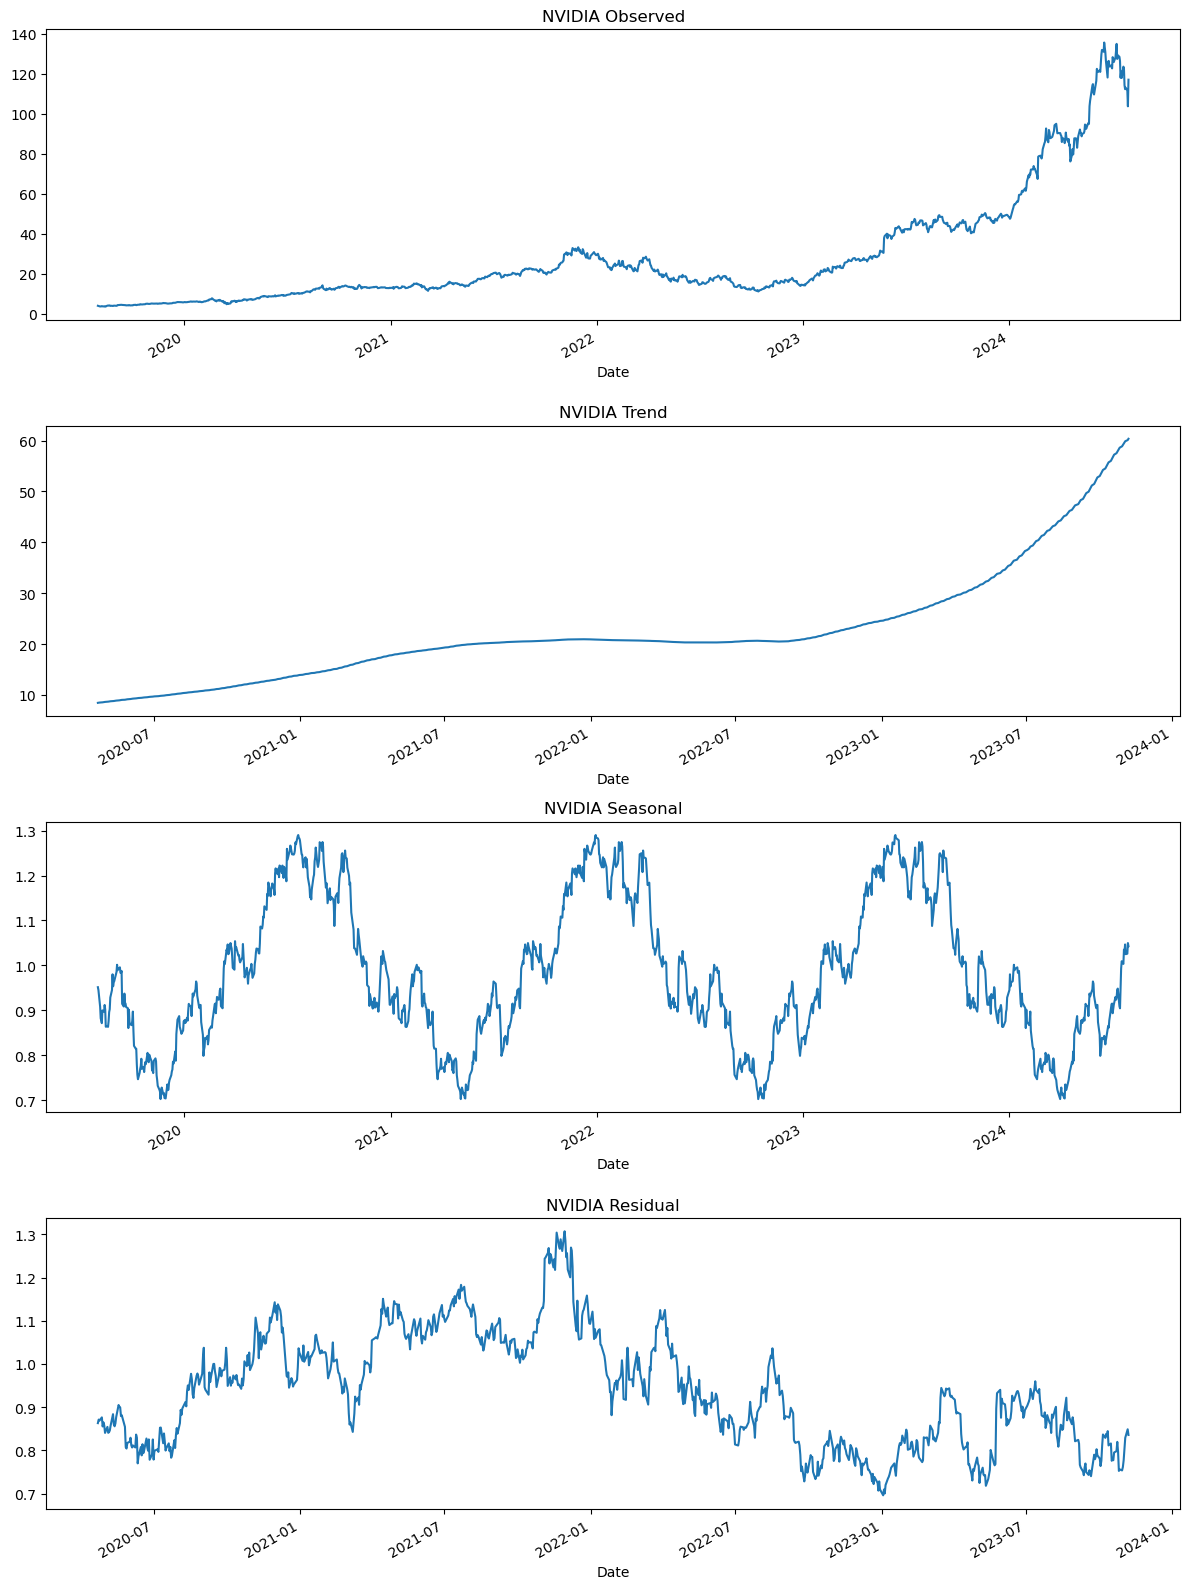

In [18]:
# 2. Multiplicative Decomposition
multiplicative_result = seasonal_decompose(nvda, model='multiplicative', period=365)

# Plot multiplicative decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
multiplicative_result.observed.plot(ax=ax1)
ax1.set_title('NVIDIA Observed')
multiplicative_result.trend.plot(ax=ax2)
ax2.set_title('NVIDIA Trend')
multiplicative_result.seasonal.plot(ax=ax3)
ax3.set_title('NVIDIA Seasonal')
multiplicative_result.resid.plot(ax=ax4)
ax4.set_title('NVIDIA Residual')
plt.tight_layout()
plt.show()

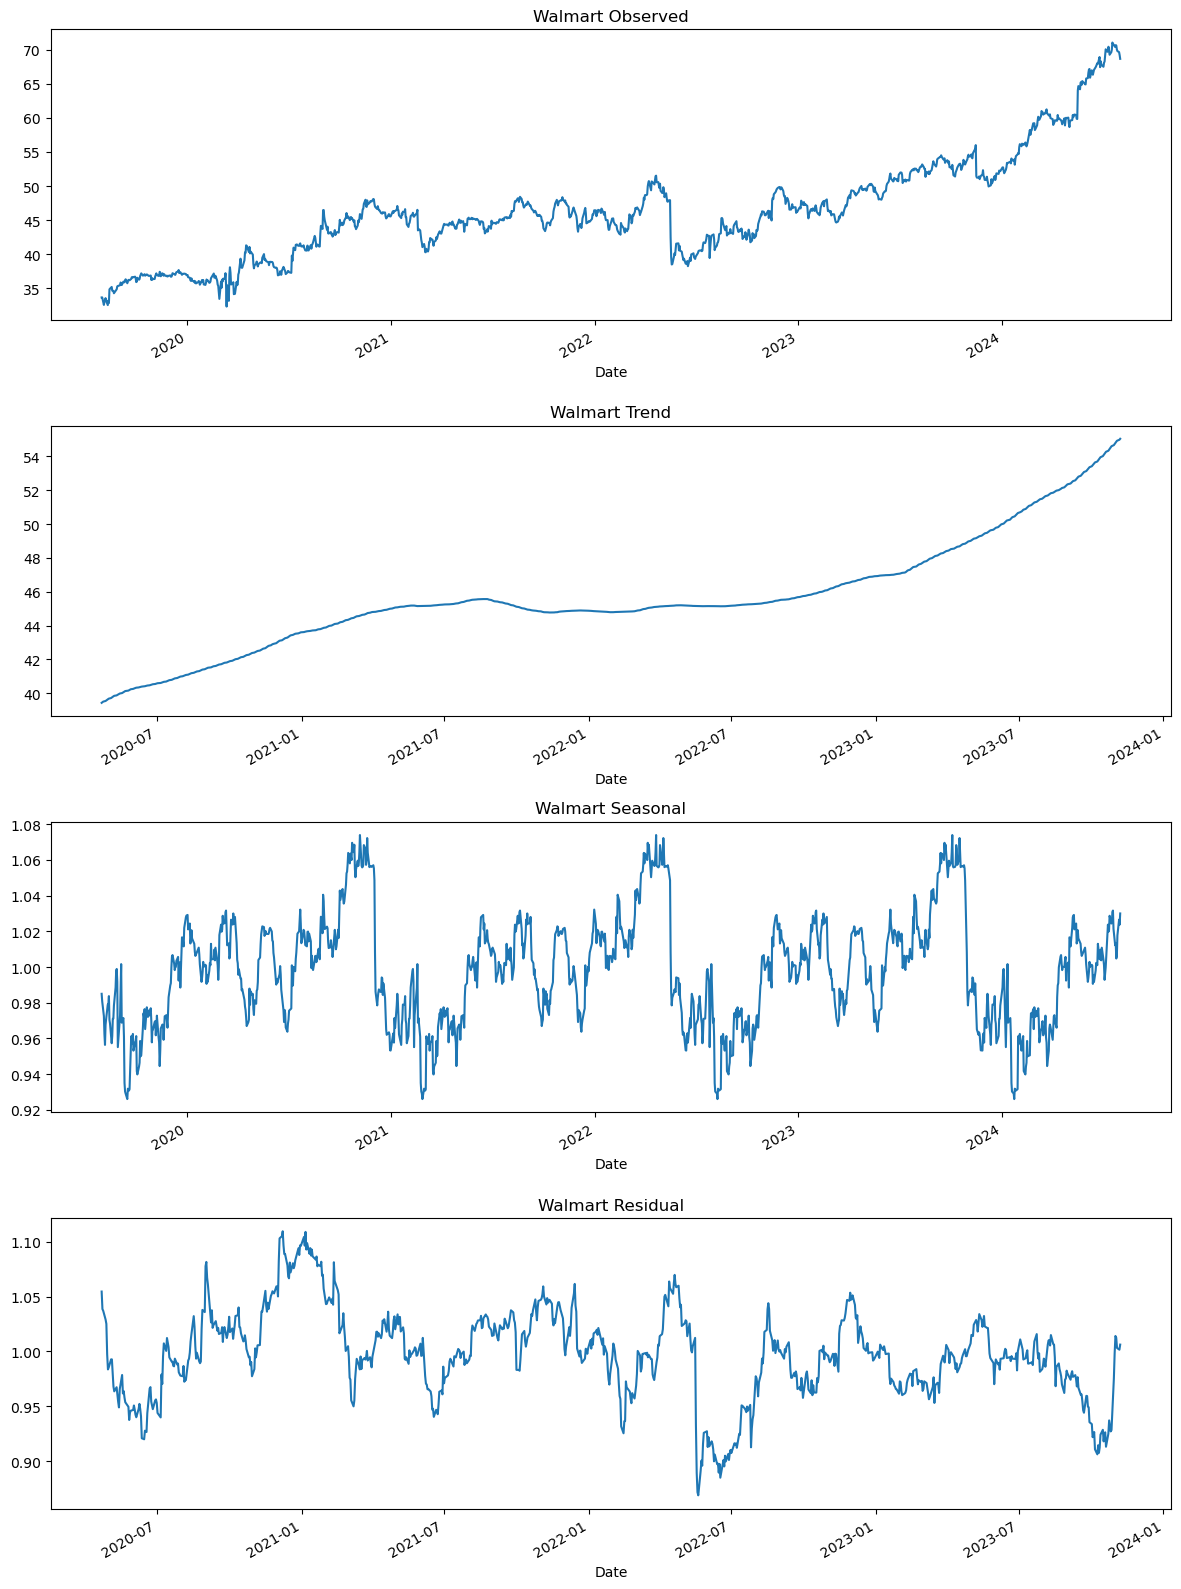

In [17]:
# 2. Multiplicative Decomposition
multiplicative_result = seasonal_decompose(walmart, model='multiplicative', period=365)

# Plot multiplicative decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
multiplicative_result.observed.plot(ax=ax1)
ax1.set_title('Walmart Observed')
multiplicative_result.trend.plot(ax=ax2)
ax2.set_title('Walmart Trend')
multiplicative_result.seasonal.plot(ax=ax3)
ax3.set_title('Walmart Seasonal')
multiplicative_result.resid.plot(ax=ax4)
ax4.set_title('Walmart Residual')
plt.tight_layout()
plt.show()

## **STL (Seasonal and Trend decomposition using Loess) Decomposition:**

**Business Sense:**

**Concept:** A more flexible method that can handle complex seasonal patterns and is robust against outliers.
**Application:** Ideal for businesses with multiple seasonal patterns or those operating in dynamic, complex environments.

**Examples:**

**Airline Industry:** Handling both weekly patterns (business travel) and yearly patterns (holiday seasons) in booking data.
**Energy Sector:** Analyzing power consumption with daily, weekly, and seasonal patterns, while being robust to unexpected events like heatwaves.

**Product Sense:**

**Usage:** Perfect for products with intricate usage patterns or those subject to multiple cyclical influences.
**Example:** A streaming service analyzing viewership patterns influenced by time of day, day of week, seasons, and content release schedules.

**Key Insight:** STL decomposition allows businesses to uncover complex patterns in their data, leading to more nuanced strategies and more accurate forecasting in complicated environments.

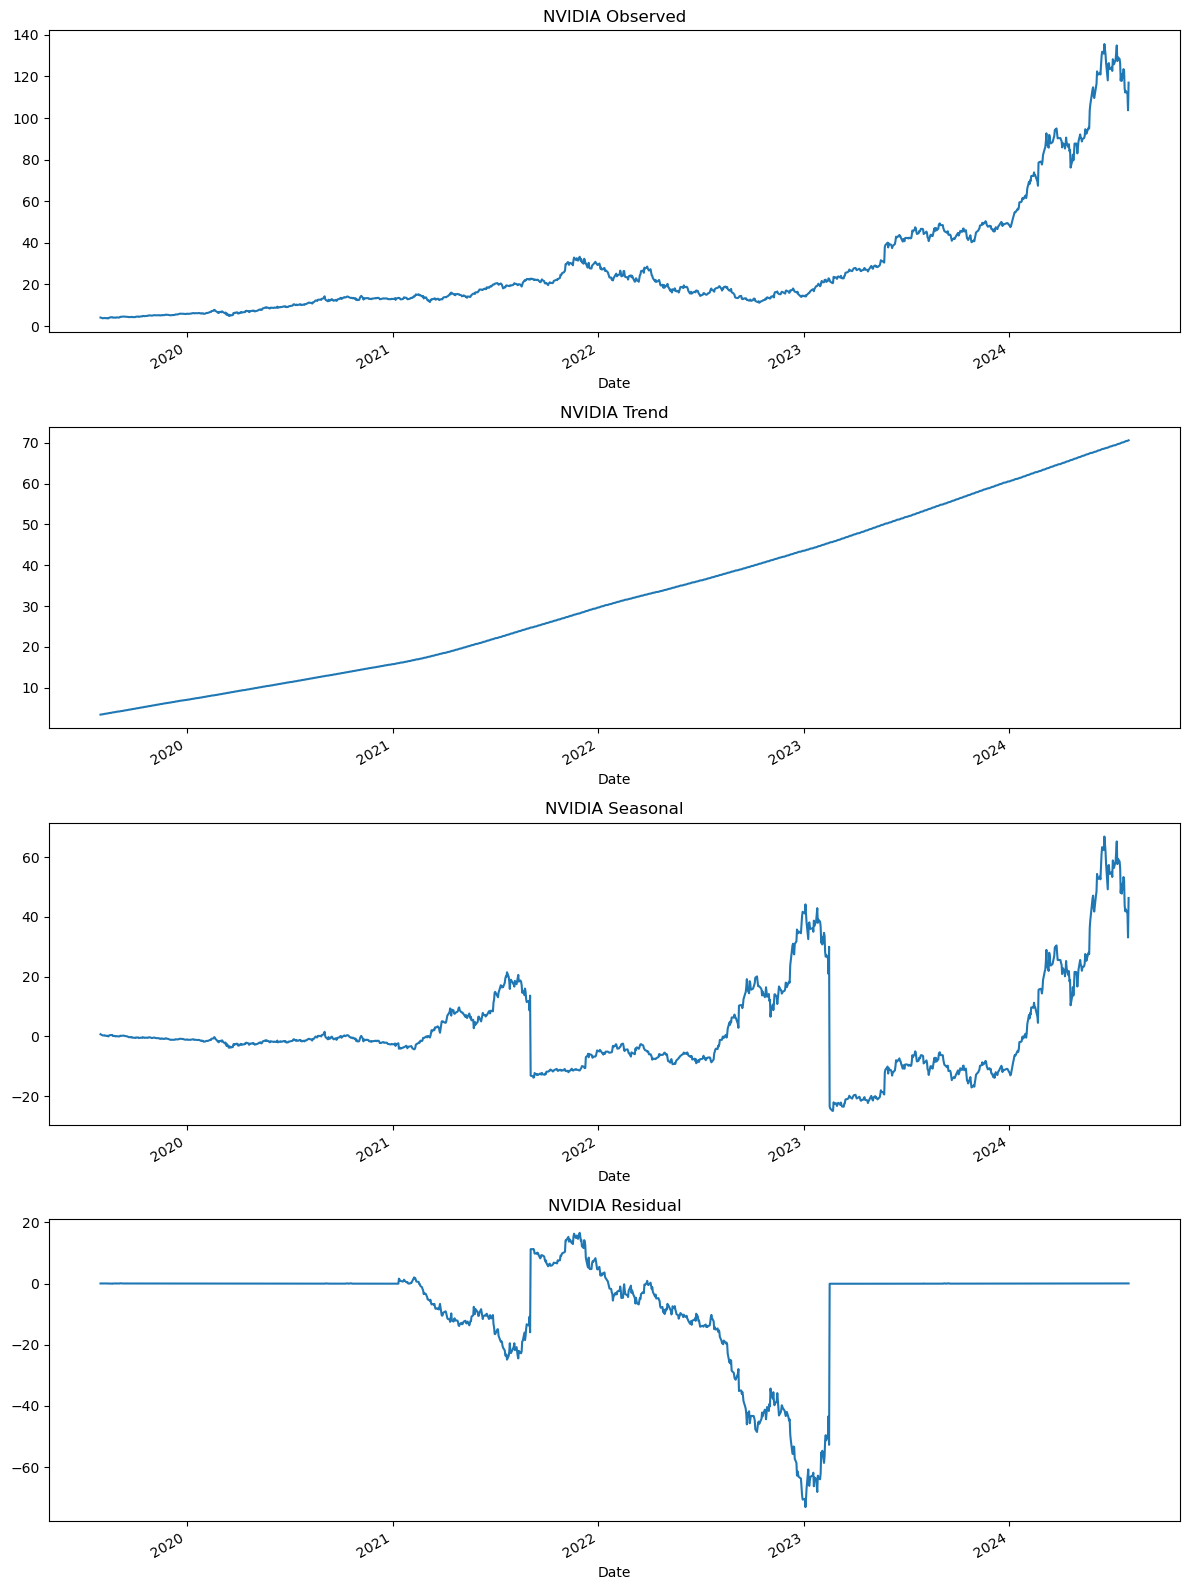

In [20]:
# 3. STL Decomposition
stl = STL(nvda, period=365, robust=True)
stl_result = stl.fit()

# Plot STL decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
stl_result.observed.plot(ax=ax1)
ax1.set_title('NVIDIA Observed')
stl_result.trend.plot(ax=ax2)
ax2.set_title('NVIDIA Trend')
stl_result.seasonal.plot(ax=ax3)
ax3.set_title('NVIDIA Seasonal')
stl_result.resid.plot(ax=ax4)
ax4.set_title('NVIDIA Residual')
plt.tight_layout()
plt.show()

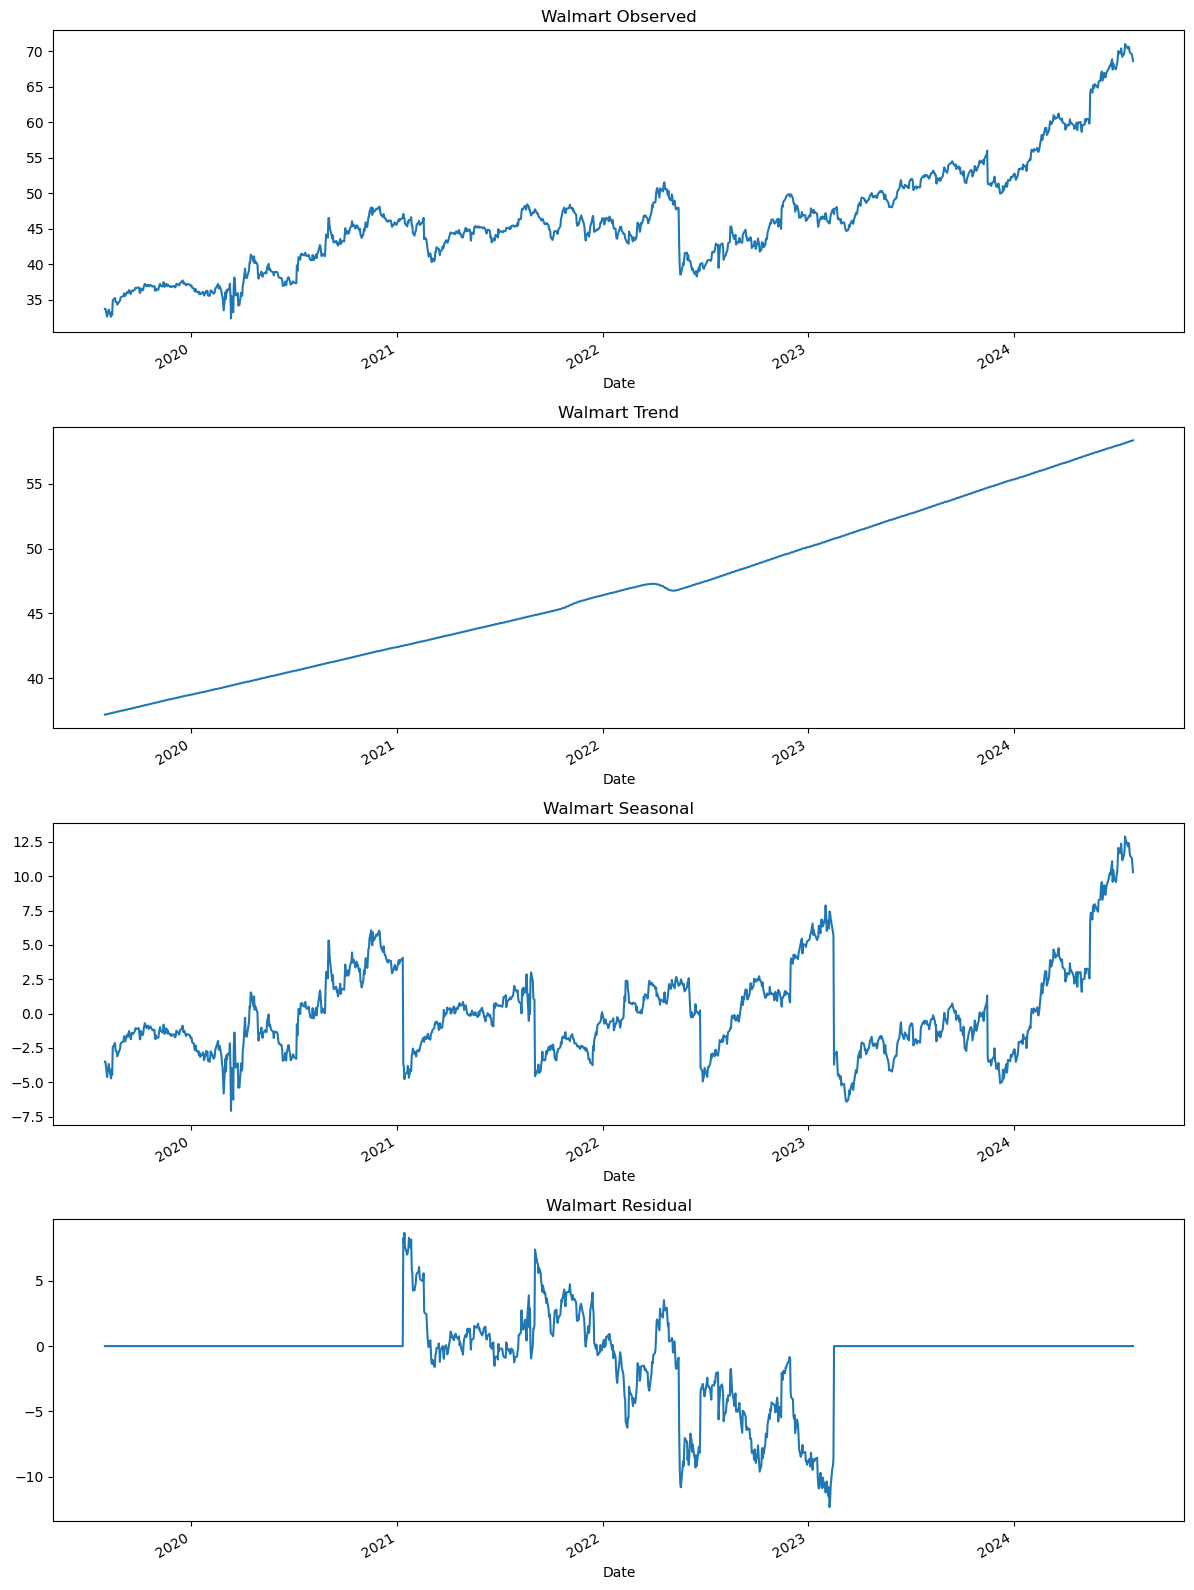

In [19]:
stl = STL(walmart, period=365, robust=True)
stl_result = stl.fit()

# Plot STL decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
stl_result.observed.plot(ax=ax1)
ax1.set_title('Walmart Observed')
stl_result.trend.plot(ax=ax2)
ax2.set_title('Walmart Trend')
stl_result.seasonal.plot(ax=ax3)
ax3.set_title('Walmart Seasonal')
stl_result.resid.plot(ax=ax4)
ax4.set_title('Walmart Residual')
plt.tight_layout()
plt.show()

### **Comparing and contrasting NVIDIA and Walmart with respect to Additive, Multiplicative, and STL Decomposition**

### 1. **Additive Decomposition**
- **Characteristics**: Used when seasonal variations are relatively constant throughout the series.
- **NVIDIA**: Showed consistent seasonality and residual components, with a trend that sharply increased towards the latter part. This could indicate that changes in stock price were consistently additive, regardless of the stock price level.
- **Walmart**: Exhibited more regular seasonality and a gently increasing trend. The residuals showed slight irregularities but were generally stable.

### 2. **Multiplicative Decomposition**
- **Characteristics**: Used when seasonal variations change proportionally over time.
- **NVIDIA**: This might reveal proportionally higher seasonal fluctuations when stock prices are higher. Such a pattern suggests that higher stock values might induce greater proportional responses to seasonal drivers.
- **Walmart**: Likely shows that seasonal patterns are more pronounced when the stock price is higher, suggesting that sales cycles or other business cycles have a more significant proportional impact during times of higher stock prices.

### 3. **STL Decomposition**
- **Characteristics**: STL (Seasonal and Trend decomposition using Loess) is flexible, allowing for changing seasonality and providing robust estimation of both trend and seasonal components.
- **NVIDIA**: STL would potentially provide a more nuanced view of NVIDIA's stock behavior, capturing non-linear trends and varying seasonal amplitude that could be influenced by technology product cycles or market sentiment shifts.
- **Walmart**: For Walmart, STL could detail how seasonal shopping behaviors and economic factors differently affect the stock across various levels of the trend, offering insights into how external factors might impact stock volatility.

### Comparing Decompositions

- **Trend Analysis**:
  - **Additive** shows a linear trend.
  - **Multiplicative** and **STL** might highlight exponential or non-linear trends especially evident in high-growth stocks like NVIDIA.
- **Seasonality Analysis**:
  - **Additive** presents constant seasonal effects.
  - **Multiplicative** shows seasonality increasing with level of the series, which might be more realistic for consumer-driven stocks like Walmart during peak shopping seasons.
  - **STL** allows for changing seasonality, potentially providing the most realistic decomposition, especially for stocks like NVIDIA that may experience rapid shifts in market dynamics.
- **Residual Analysis**:
  - **Additive** might not capture complex anomalies or non-linear irregular patterns as effectively as **Multiplicative** or **STL**, which adjust the residuals based on the level of the trend and seasonality.

### Strategic Implications
For analysts and strategists, choosing between these decompositions depends on the specific characteristics of the stock and the underlying business model:
- **NVIDIA**: Given its tech focus and rapid growth, Multiplicative or STL might provide deeper insights into how new tech developments or market conditions disproportionately affect the stock.
- **Walmart**: As a retail giant, Walmart may benefit from Multiplicative or STL during periods of significant sales fluctuations, where seasonality is inherently linked to the stock's level.

Each decomposition technique offers different lenses through which to view the data, and the choice of method should align with the specific analytical needs and the nature of the time series data. For more nuanced and dynamic series, STL often provides the most flexibility and insight, particularly useful in rapidly changing industries like technology.